In [1]:
import scipy
import numpy as np
import scipy.stats
import pandas as pd
import os

import matplotlib.pylab as plt
%matplotlib inline

In [2]:
os.getenv("PUIDATA")

'/Users/apple/Desktop/PUI2017/PUIdata'

# 0. data cleaning

### the first dataset 'World firearms murders and ownership' of 2012

In [3]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + 'World firearms murders and ownership - Sheet 1.csv')
df1.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [4]:
print(df1.shape)

(185, 9)


In [5]:
df1 = df1.drop(labels = ['ISO code', 'Source', '% of homicides by firearm', 'Rank by rate of ownership'], axis = 1)
df1 = df1.rename(columns = {'Country/Territory': 'Country',
                           'Average firearms per 100 people': 'Firearms per 100 people',
                           'Homicide by firearm rate per 100,000 pop': 'Homicide by firearm per 100,000 pop',
                           'Average total all civilian firearms':'Total civilian firearms'})
df1.head()

,Country,Number of homicides by firearm,"Homicide by firearm per 100,000 pop",Firearms per 100 people,Total civilian firearms
0,Albania,56.0,1.76,8.6,270000.0
1,Algeria,20.0,0.06,7.6,1900000.0
2,Angola,NaN,NaN,17.3,2800000.0
3,Anguilla,1.0,7.14,NaN,NaN
4,Argentina,1198.0,3.02,10.2,3950000.0


### the second dataset 'The number of gun owned vs. the number of mass shootings' (see: [here](https://datawrapper.dwcdn.net/pvLFI/4/))

In [6]:
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + 'data-pvLFI.csv')
df2.head()

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [7]:
df2.shape

(25, 3)

In [8]:
# check the countries' names
df2[df2['Country'].isin(df1['Country'])==0]

,Country,Guns/100 inhabitants,Number of mass shootings
2,Beligium,17.2,2
9,Holland,3.9,2
23,United Kingdom,6.2,3


### why these 3 countries are not in df1? we need to find out

In [9]:
df1[df1['Country'].str.contains('England')]

,Country,Number of homicides by firearm,"Homicide by firearm per 100,000 pop",Firearms per 100 people,Total civilian firearms
52,England and Wales,41.0,0.07,6.2,3400000.0


In [10]:
df1[df1['Country'].str.contains('Scotland')]

,Country,Number of homicides by firearm,"Homicide by firearm per 100,000 pop",Firearms per 100 people,Total civilian firearms
145,Scotland,NaN,NaN,5.5,280000.0


In [11]:
df1[df1['Country'].str.contains('Net')]

,Country,Number of homicides by firearm,"Homicide by firearm per 100,000 pop",Firearms per 100 people,Total civilian firearms
121,Netherlands,55.0,0.33,3.9,510000.0


In [12]:
df1[df1['Country'].str.contains('Belgium')]

,Country,Number of homicides by firearm,"Homicide by firearm per 100,000 pop",Firearms per 100 people,Total civilian firearms
14,Belgium,70.0,0.68,17.2,1800000.0


### From above, we could know that the 3 missing countries are UK, Netherlands and Belgium, which are all in df1.
### and because the 'Average firearms per 100 people' of 'England and Wales' in df1 exactly = df2, so we consider that is the data of  'England and Wales' not 'United Kingdoms'(also with scotland)
### we replace the countries' name and merge df1 and df2

In [13]:
df2.replace(['Beligium', 'Holland', 'United Kingdom'],['Belgium','Netherlands', 'England and Wales'], 
            inplace = True)

In [14]:
df1_2 = pd.merge(df1, df2, how = 'inner')
df1_2.shape

(25, 7)

In [15]:
## to check does the column 'Firearms per 100 people' and 'Guns/100 inhabitants' exactly the same
sum(df1_2['Firearms per 100 people'] != df1_2['Guns/100 inhabitants'])

0

In [16]:
## the answer is yes, so we delete one column
df1_2 = df1_2.drop(labels = ['Guns/100 inhabitants'], axis = 1)
df1_2.head()

,Country,Number of homicides by firearm,"Homicide by firearm per 100,000 pop",Firearms per 100 people,Total civilian firearms,Number of mass shootings
0,Australia,30.0,0.14,15.0,3050000.0,4
1,Austria,18.0,0.22,30.4,2500000.0,1
2,Belgium,70.0,0.68,17.2,1800000.0,2
3,Canada,173.0,0.51,30.8,9950000.0,4
4,Denmark,15.0,0.27,12.0,650000.0,0


# 2. plot the average number of civilian fire arms per person
first without errors, then with errors. are there points that look like outliers?

In [17]:
firearms_100 = df1['Firearms per 100 people'].dropna()
len(firearms_100)

176

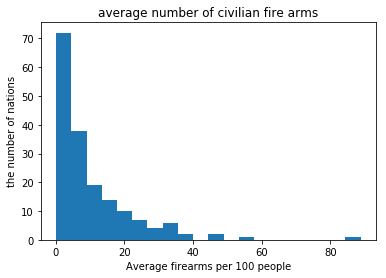

In [18]:
plt.hist(firearms_100, bins = 20)
plt.title('average number of civilian fire arms')
plt.xlabel('Average firearms per 100 people')
plt.ylabel('the number of nations')

### there are outlier larger than 80 per 100 people , we could filter it out

In [19]:
df1[df1['Firearms per 100 people'] > 40]

,Country,Number of homicides by firearm,"Homicide by firearm per 100,000 pop",Firearms per 100 people,Total civilian firearms
58,Finland,24.0,0.45,45.3,2400000.0
162,Switzerland,57.0,0.77,45.7,3400000.0
176,United States,9146.0,2.97,88.8,270000000.0
182,Yemen,NaN,NaN,54.8,11500000.0


### from the table below, we could see the outlier is United States with 89 average firearms per 100 people, much larger than the second one Yemen with 55

# 3.plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

## 3.1 average number of homicide by fire arms per person

In [20]:
homicide_100000 = df1['Homicide by firearm per 100,000 pop'].dropna()
len(homicide_100000)

116

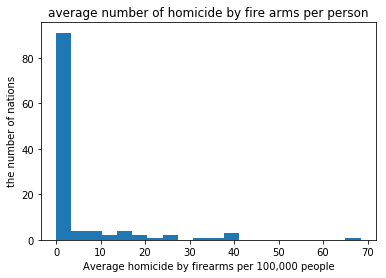

In [21]:
plt.hist(homicide_100000, bins = 20)
plt.title('average number of homicide by fire arms per person')
plt.xlabel('Average homicide by firearms per 100,000 people')
plt.ylabel('the number of nations')

### there are outlier larger than 50 homicide by firearms per 100,000 people , we could filter it out


In [22]:
df1[df1['Homicide by firearm per 100,000 pop'] > 30]

,Country,Number of homicides by firearm,"Homicide by firearm per 100,000 pop",Firearms per 100 people,Total civilian firearms
51,El Salvador,2446.0,39.90,5.8,400000.0
67,Guatemala,5009.0,34.81,13.1,1650000.0
72,Honduras,5201.0,68.43,6.2,500000.0
83,Jamaica,1080.0,39.40,8.1,215000.0
142,Saint Kitts and Nevis,17.0,32.44,NaN,NaN
179,Venezuela,11115.0,38.97,10.7,2850000.0


## from the table below, we could see the outlier is Honduras with 68 homicide by firearms per 100,000 people, while others are all below 40

## 3.2 average number of homicide by fire arms per person vs GDP

# 4.plot the number of  homicides by fire arm against the number of civilian firearms. (plot the  US in a different color)
with and without errorbars

In [23]:
h_f = df1[['Country','Firearms per 100 people','Homicide by firearm per 100,000 pop']].dropna()

In [24]:
len(h_f)

107

In [25]:
h_f = h_f.rename(columns = {'Firearms per 100 people':'x','Homicide by firearm per 100,000 pop':'y'})

In [26]:
h_f.head()

,Country,x,y
0,Albania,8.6,1.76
1,Algeria,7.6,0.06
4,Argentina,10.2,3.02
5,Armenia,12.5,0.29
6,Australia,15.0,0.14


In [27]:
h_f_us = h_f[h_f['Country'] == 'United States']
h_f_us

,Country,x,y
176,United States,88.8,2.97


### number of  homicides by firearms per capita against number of firearms per capita (without errorbars)

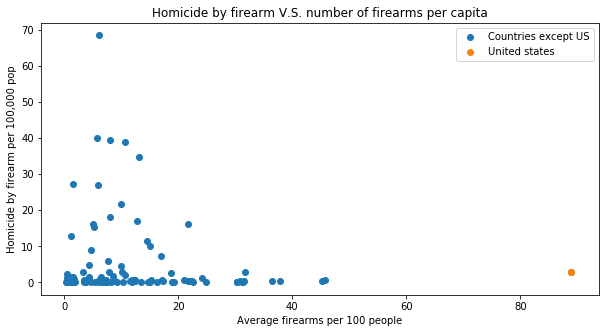

In [28]:
plt.figure(figsize = (10,5))
plt.scatter(h_f.x, h_f.y, label = 'Countries except US')
plt.scatter(h_f_us.x, h_f_us.y, label = 'United states')
plt.title('Homicide by firearm V.S. number of firearms per capita')
plt.xlabel('Average firearms per 100 people')
plt.ylabel('Homicide by firearm per 100,000 pop')
plt.legend()

### number of  homicides by firearms per capita against number of firearms per capita  (with errorbars)

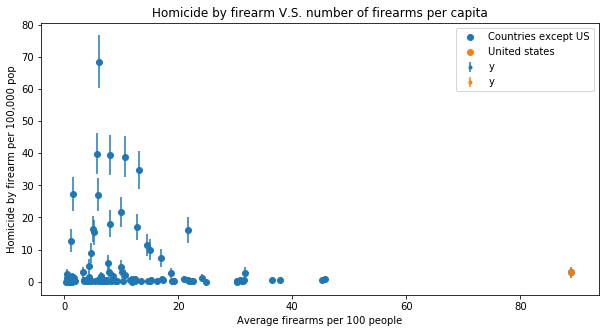

In [29]:
plt.figure(figsize = (10,5))
plt.scatter(h_f.x, h_f.y, label = 'Countries except US')
plt.scatter(h_f_us.x, h_f_us.y, label = 'United states')
plt.title('Homicide by firearm V.S. number of firearms per capita')
plt.xlabel('Average firearms per 100 people')
plt.ylabel('Homicide by firearm per 100,000 pop')

plt.errorbar(h_f.x, h_f.y, yerr = np.sqrt(h_f.y), fmt = '.') 
plt.errorbar(h_f_us.x, h_f_us.y, yerr = np.sqrt(h_f_us.y), fmt = '.') 
plt.legend()

## From the above plot, we could see that although United States has the highest firearms rate per capita(88.8/100), its homicide rate by firearms(2.97/100,000) is not outstanding among 107 countries in 2012

# 5. plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars

In [30]:
m_f = df1_2[['Country','Firearms per 100 people','Number of mass shootings']].dropna()

In [31]:
len(m_f)

25

In [32]:
m_f = m_f.rename(columns = {'Firearms per 100 people':'x','Number of mass shootings':'y'})

In [33]:
m_f.head()

,Country,x,y
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [34]:
m_f_us = m_f[m_f['Country'] == 'United States']
m_f_us

,Country,x,y
24,United States,88.8,78


### number of  mass shootings against number of firearms per capita (without errorbars)

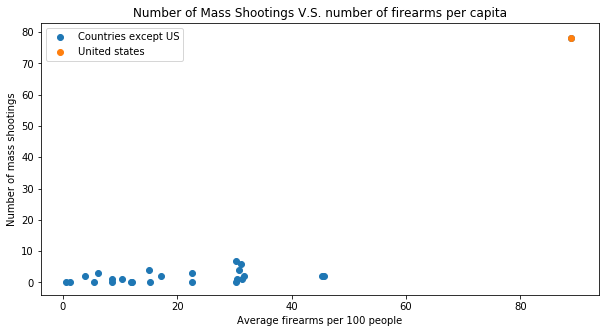

In [35]:
plt.figure(figsize = (10,5))
plt.scatter(m_f.x, m_f.y, label = 'Countries except US')
plt.scatter(m_f_us.x, m_f_us.y, label = 'United states')
plt.title('Number of Mass Shootings V.S. number of firearms per capita')
plt.xlabel('Average firearms per 100 people')
plt.ylabel('Number of mass shootings')
plt.legend()

### number of mass shootings against number of firearms per capita (with errorbars)

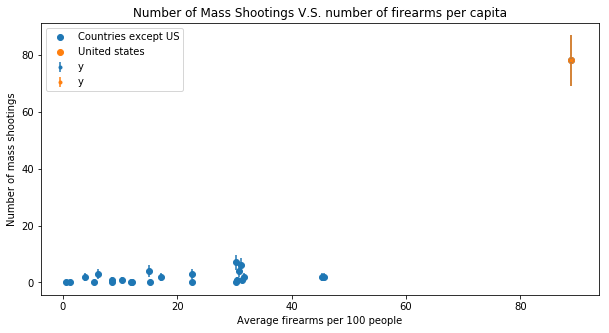

In [36]:
plt.figure(figsize = (10,5))
plt.scatter(m_f.x, m_f.y, label = 'Countries except US')
plt.scatter(m_f_us.x, m_f_us.y, label = 'United states')
plt.title('Number of Mass Shootings V.S. number of firearms per capita')
plt.xlabel('Average firearms per 100 people')
plt.ylabel('Number of mass shootings')

plt.errorbar(m_f.x, m_f.y, yerr = np.sqrt(m_f.y), fmt = '.') 
plt.errorbar(m_f_us.x, m_f_us.y, yerr = np.sqrt(m_f_us.y), fmt = '.') 
plt.legend()

## From the above plot, we could see that United States has the highest firearms rate per capita(88.8/100) and the most numerous mass shootings(78) among 25 countres in 2012

# 6. Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);


